# Задание 9

При снятии показаний измерительного прибора десятые доли деления шкалы прибора оцениваются "на глаз" наблюдателем. Количество цифр 0, 1, 2, ..., 9, записанных наблюдателем в качестве десятых долей при 100 независимых измерениях, равны 5, 8, 6, 12, 14, 18, 11, 6, 13, 7 соответственно.

In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import scipy as sp

In [2]:
class Hi2:
    def __init__(self, n):
        self.n = n
        self.p = lambda x : (1/2)**(n/2) * x**(n/2 - 1) * np.exp(-x/2) / sp.special.gamma(n/2)
    
    def P(self, a, b):
        return sp.integrate.quad(self.p, a, b)[0]

    
def check_p_value(p_value, alpha):
    if (p_value <= alpha):
        print("Отвергаем основную гипотезу")
    else:
        print("Нет оснований отвергнуть основную гипотезу")

In [3]:
X = [5, 8, 6, 12, 14, 18, 11, 6, 13, 7]
n = 100
alpha = 0.05

## Пункт a

Проверить гипотезу о согласии данных с законом равномерного распределения с помощью критерия $\chi^{2}$ и с помощью критерия Колмогорова. Сравнить результаты.

#### Критерий Пирсона

In [63]:
P = [1/len(X)] * len(X)
print(f"P = {P}")

P = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


In [81]:
delta = np.sum([ (X[i] - n*P[i])**2/(n*P[i]) for i in range(len(X)) ])
print(f"delta = {round(delta, 4)}")

delta = 16.4


In [82]:
p_value = Hi2(len(X)-1).P(delta, math.inf)
print(f"p_value = {round(p_value, 4)}")

p_value = 0.059


In [83]:
check_p_value(p_value, alpha)

Нет оснований отвергнуть основную гипотезу


#### Критерий Колмогорова

In [84]:
def F_emp(x, X, n):
    F = 0
    for i in range(len(X)):
        if i < x:
            F += X[i]/n
    return F

def F(x):
    if x <= -0.5:
        return 0.0
    elif x >= 9.5:
        return 1.0
    else:
        return (x + 0.5) / 10.0

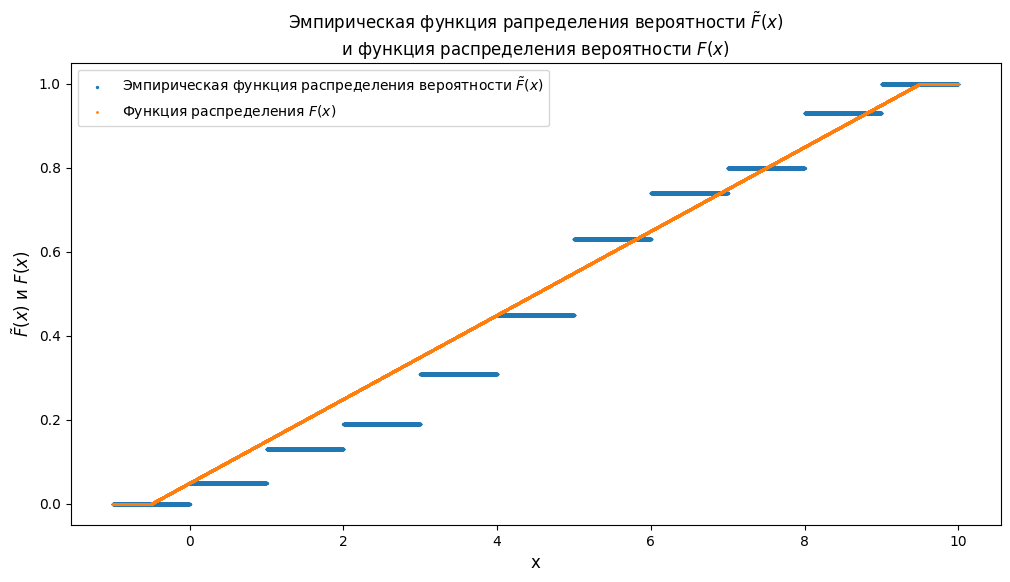

In [85]:
fig, ax = plt.subplots()

x_axis = np.linspace(-1.0, 10.0, 11000)

ax.scatter(x_axis, [F_emp(t, X, n) for t in x_axis], s=2, label='Эмпирическая функция распределения вероятности $\\tilde F(x)$')
ax.scatter(x_axis, [F(t) for t in x_axis], s=1, label='Функция распределения $F(x)$')

ax.set_title('Эмпирическая функция рапределения вероятности $\\tilde F(x)$\nи функция распределения вероятности $F(x)$')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('$\\tilde F(x)$ и $F(x)$', fontsize=12)
ax.legend()
fig.set_figheight(6)
fig.set_figwidth(12)


plt.show()

In [86]:
delta_F = [np.abs(F_emp(t, X, n) - F(t)) for t in x_axis]
delta = np.sqrt(n) * np.max(delta_F)
print(f"delta = {round(delta, 4)}")

delta = 1.5994


$K(x) = P(\Delta < x) = 1 + 2 \sum\limits_{k=1}^{\infty} (-1)^{k}e^{-2k^{2}x^{2}}$

$\text{p-value} = P(\Delta \ge \tilde \Delta) = -2 \sum\limits_{k=1}^{\infty} (-1)^{k}e^{-2k^{2}x^{2}}$

In [87]:
K = 1000
p_value = -2 * np.sum([ (-1)**k * np.exp(-2 * k**2 * delta**2) for k in range(1, K) ])
print(f"p_value = {round(p_value, 4)}")

p_value = 0.012


In [88]:
check_p_value(p_value, alpha)

Отвергаем основную гипотезу


#### Сравнение результатов

Критерий Пирсона не выявил достаточных оснований для отвержения гипотезы. Критерий Колмогорова отверг основную гипотезу.

## Пункт b

Проверить гипотезу о согласии данных с нормальным законом распределения с помощью критерия $\chi^{2}$ (оценки неизвестных параметров определить численно, максимизируя функцию правдоподобия, построенную на группированной выборке) и с помощью критерия Колмогорова (распределения критерия определить бутстрапом). Сравнить результаты.

#### Критерий Пирсона

Натуральный логарифм функции правдободобия $ln(L(\theta_1, \theta_2, X_n))$

In [89]:
def ln_L(theta_1, theta_2, X):
    f = lambda x: 1.0 / np.sqrt(2*np.pi*theta_2**2) * np.exp(-(x-theta_1)**2 / (2*theta_2**2))
    val = 0.0
    for i in range(len(X)):
        a = (i - 0.5) if i != 0 else -math.inf
        b = (i + 0.5) if i != len(X) - 1 else math.inf
        val += X[i] * np.log(sp.integrate.quad(f, a, b)[0])
    return val

Построим график натурального логарифма функции правдободобия, чтобы удостовериться в единственности максимума исследуемой функции.
Для примера график нарисован при: $3.0 \le \theta_1 \le 7.0$ и $1.5 \le \theta_2 \le 4.5$.

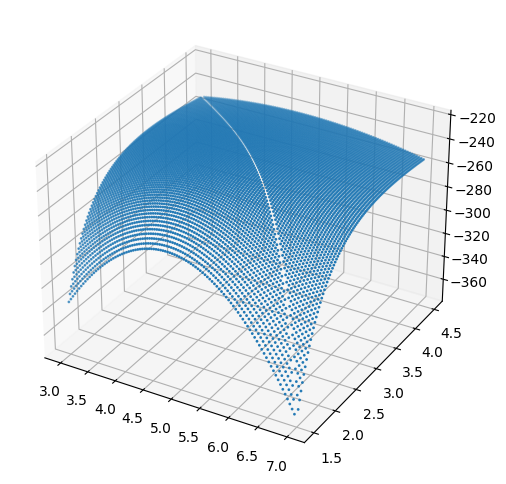

In [90]:
from mpl_toolkits.mplot3d import Axes3D

x = [3.0 + k/100 * 4.0 for k in range(101)]
xgrid = []
for i in range(len(x)):
    for j in range(100):
        xgrid.append(x[i])

y = [1.5 + k/100 * 3.0 for k in range(101)]
ygrid = y * 100

z = [ln_L(xgrid[i], ygrid[i], X) for i in range(len(xgrid))]

fig = plt.figure(figsize=(12, 6))
ax_3d = Axes3D(fig)
ax_3d = fig.add_subplot(projection='3d')
ax_3d.scatter(xgrid, ygrid, z, s=1)
plt.show()

Численный поиск точки максимума натурального логарифма функции правдободобия (и, соответственно, самой функции правдоподобия).
Начальные значения параметров, от которых ведется поиск:

$\theta_1^0 = 5.0$

$\theta_2^0 = 2.5$

In [91]:
theta_1_0 = 5.0
theta_2_0 = 2.5

h_theta_1 = 0.0001
h_theta_2 = 0.0001

theta_1_cur = theta_1_0
theta_2_cur = theta_2_0

while True:
    ln_L_cur = ln_L(theta_1_cur, theta_2_cur, X)
    ln_L_cur_steps = [
        ln_L(theta_1_cur - h_theta_1, theta_2_cur, X),
        ln_L(theta_1_cur + h_theta_1, theta_2_cur, X),
        ln_L(theta_1_cur, theta_2_cur - h_theta_2, X),
        ln_L(theta_1_cur, theta_2_cur + h_theta_2, X),
    ]
    if (np.max(ln_L_cur_steps) <= ln_L_cur):
        break
    else:
        i = np.argmax(ln_L_cur_steps)
        if i == 0:
            theta_1_cur -= h_theta_1
        elif i == 1:
            theta_1_cur += h_theta_1
        elif i == 2:
            theta_2_cur -= h_theta_2
        elif i == 3:
            theta_2_cur += h_theta_2

theta_1_max = theta_1_cur
theta_2_max = theta_2_cur

print(f"theta_1_max = {round(theta_1_max, 4)}\ntheta_2_max = {round(theta_2_max, 4)}")

theta_1_max = 4.7897
theta_2_max = 2.6795


In [94]:
f = lambda x: 1.0 / np.sqrt(2*np.pi*theta_2_max**2) * np.exp(-(x-theta_1_max)**2 / (2*theta_2_max**2))
P = [0.0] * len(X)
for i in range(len(X)):
    a = (i - 0.5) if i != 0 else -math.inf
    b = (i + 0.5) if i != len(X) - 1 else math.inf
    P[i] = sp.integrate.quad(f, a, b)[0]

print(f"P = {[round(p, 4) for p in P]}")

P = [0.0547, 0.0551, 0.0866, 0.1187, 0.1418, 0.1476, 0.1338, 0.1058, 0.0728, 0.0831]


In [95]:
delta = np.sum([ (X[i] - n*P[i])**2 / (n*P[i]) for i in range(len(X)) ])
print(f"delta = {round(delta, 4)}")

delta = 9.8025


In [96]:
p_value = Hi2(len(X)-1-2).P(delta, math.inf)
print(f"p_value = {round(p_value, 4)}")

p_value = 0.2


In [97]:
check_p_value(p_value, alpha)

Нет оснований отвергнуть основную гипотезу


#### Критерий Колмогорова

По методу моментов находим оценки параметров $\tilde\theta_1$ и $\tilde\theta_2$.

In [20]:
def get_theta_1_est(X):
    return np.sum([i*X[i] for i in range(len(X))])/n

def get_theta_2_est(X):
    return np.sqrt( np.sum([(i**2)*X[i] for i in range(len(X))])/n - (np.sum([i*X[i] for i in range(len(X))])/n)**2 )

In [98]:
theta_1_est = get_theta_1_est(X)
theta_2_est = get_theta_2_est(X)
print(f"theta_1_est = {round(theta_1_est, 4)}\ntheta_2_est = {round(theta_2_est, 4)}")

theta_1_est = 4.77
theta_2_est = 2.5054


In [99]:
def F_emp(x, X, n):
    F = 0
    for i in range(len(X)):
        if i < x:
            F += X[i]/n
    return F

def F(x, theta_1, theta_2):
    f = lambda t : 1.0 / np.sqrt(2*np.pi*theta_2**2) * np.exp(-(t - theta_1)**2 / (2*theta_2**2))
    return sp.integrate.quad(f, -math.inf, x)[0]

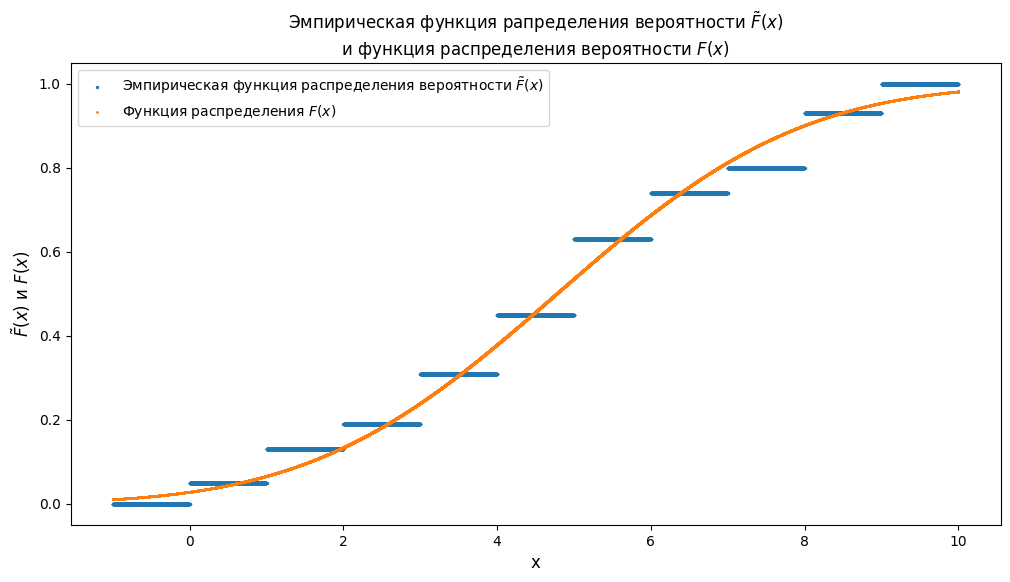

In [110]:
fig, ax = plt.subplots()

x_axis = np.linspace(-1.0, 10.0, 11000)

ax.scatter(x_axis, [F_emp(t, X, n) for t in x_axis], s=2, label='Эмпирическая функция распределения вероятности $\\tilde F(x)$')
ax.scatter(x_axis, [F(t, theta_1_est, theta_2_est) for t in x_axis], s=1, label='Функция распределения $F(x)$')

ax.set_title('Эмпирическая функция рапределения вероятности $\\tilde F(x)$\nи функция распределения вероятности $F(x)$')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('$\\tilde F(x)$ и $F(x)$', fontsize=12)
ax.legend()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.show()

In [101]:
delta_F = [np.abs(F_emp(t, X, n) - F(t, theta_1_est, theta_2_est)) for t in x_axis]
delta = np.sqrt(n) * np.max(delta_F)
print(f"delta = {round(delta, 4)}")

delta = 1.0132


Формируем выборки размера $n$ в количестве $N = 50000$ штук.

In [25]:
N = 50000

def to_int_value(x):
    for i in range(len(X)):
        a = (i - 0.5) if i != 0 else -math.inf
        b = (i + 0.5) if i != len(X) - 1 else +math.inf
        if a <= x and x < b:
            return i

def get_selection(theta_1, theta_2):
    values = theta_2 * np.random.randn(n) + theta_1 * np.ones([1, n])
    int_values = np.array([to_int_value(x) for x in values[0]])
    Y = np.array([np.count_nonzero(int_values == i) for i in range(len(X))])
    return Y
    
selections = [get_selection(theta_1_est, theta_2_est) for _ in range(N)]

Для сформированных выбором определяем $\tilde\Delta_k$ ($1 \le k \le N$)

In [26]:
deltas = np.zeros(N)

for i in range(N):
    theta_1_est_ = get_theta_1_est(selections[i])
    theta_2_est_ = get_theta_2_est(selections[i])
    x_axis_ = np.hstack([np.array([i for i in range(len(X))]), np.array([i+0.0001 for i in range(len(X))])])
    delta_F_ = [np.abs(F_emp(t, selections[i], n) - F(t, theta_1_est_, theta_2_est_)) for t in x_axis_]
    delta_ = np.sqrt(n) * np.max(delta_F_)
    deltas[i] = delta_

Строим вариационный ряд $\tilde\Delta_{(k)}$ ($1 \le k \le N$)

In [102]:
deltas = np.sort(deltas)
print(f"[{round(deltas[0], 4)}, {round(deltas[1], 4)}, ..., {round(deltas[-2], 4)}, {round(deltas[-1], 4)}]")

[0.6242, 0.6483, ..., 37.0869, 40.3689]


In [103]:
p_value = 0
for k in range(2, N+1):
    if deltas[k-2] < delta and deltas[k-1] >= delta:
        p_value = 1 - (k-1)/N
        break
print(f"p_value = {round(p_value, 4)}")

p_value = 0.9992


In [104]:
check_p_value(p_value, alpha)

Нет оснований отвергнуть основную гипотезу


#### Сравнение результатов

Оба критерия не выявили оснований для отвержения гипотезы. Но, стоит отметить, подсчитанный $\text{p-value}$ через критерий Колмогорова оказался примерно в 4 раза больше, чем посчитанный по критерию Пирсона.

## Пункт c

Проверить гипотезу о согласии данных с нормальным законом распределения с помощью критерия $\chi^{2}$ (оценки неизвестных параметров распределения определить с помощью метода моментов). Распределение критерия найти бутстрапом. Сравнить найденное распределение с распределениями $\chi^{2}(k-1)$ и $\chi^{2}(k-3)$.

По методу моментов находим оценки параметров $\tilde\theta_1$ и $\tilde\theta_2$.

In [32]:
def get_theta_1_est(X):
    return np.sum([i*X[i] for i in range(len(X))])/n

def get_theta_2_est(X):
    return np.sqrt( np.sum([(i**2)*X[i] for i in range(len(X))])/n - (np.sum([i*X[i] for i in range(len(X))])/n)**2 )

In [105]:
theta_1_est = get_theta_1_est(X)
theta_2_est = get_theta_2_est(X)
print(f"theta_1_est = {round(theta_1_est, 4)}\ntheta_2_est = {round(theta_2_est, 4)}")

theta_1_est = 4.77
theta_2_est = 2.5054


Оценка $\tilde\Delta$

In [106]:
def get_delta_est(X, n):
    theta_1 = get_theta_1_est(X)
    theta_2 = get_theta_2_est(X)
    f = lambda x : 1.0 / np.sqrt(2*np.pi*theta_2**2) * np.exp(-(x - theta_1)**2 / (2*theta_2**2))
    P = np.zeros(len(X))
    for i in range(len(X)):
        a = (i - 0.5) if i != 0 else -math.inf
        b = (i + 0.5) if i != len(X) - 1 else +math.inf
        P[i] = sp.integrate.quad(f, a, b)[0]
    delta = np.sum([ (X[i] - n * P[i])**2 / (n * P[i]) for i in range(len(X)) ])
    return delta

delta_est = get_delta_est(X, n)
print(round(delta_est, 4))

10.799


Формируем выборки размера $n$ в количестве $N = 50000$ штук.

In [51]:
N = 50000

def to_int_value(x):
    for i in range(len(X)):
        a = (i - 0.5) if i != 0 else -math.inf
        b = (i + 0.5) if i != len(X) - 1 else +math.inf
        if a <= x and x < b:
            return i

def get_selection(theta_1, theta_2):
    values = theta_2 * np.random.randn(n) + theta_1 * np.ones([1, n])
    int_values = np.array([to_int_value(x) for x in values[0]])
    Y = np.array([np.count_nonzero(int_values == i) for i in range(len(X))])
    return Y
    
selections = [get_selection(theta_1_est, theta_2_est) for _ in range(N)]

Для сформированных выбором определяем $\tilde\Delta_k$ ($1 \le k \le N$)

In [52]:
deltas = np.zeros(N)

for i in range(N):
    delta_est_ = get_delta_est(selections[i], n)
    deltas[i] = delta_est_

Строим вариационный ряд $\tilde\Delta_{(k)}$ ($1 \le k \le N$)

In [107]:
deltas = np.sort(deltas)
print(f"[{round(deltas[0], 4)}, {round(deltas[1], 4)}, ..., {round(deltas[-2], 4)}, {round(deltas[-1], 4)}]")

[0.6242, 0.6483, ..., 37.0869, 40.3689]


Построим распределение $\Delta$ и сравним с $\chi^2(k-1)$ и $\chi^2(k-3)$.

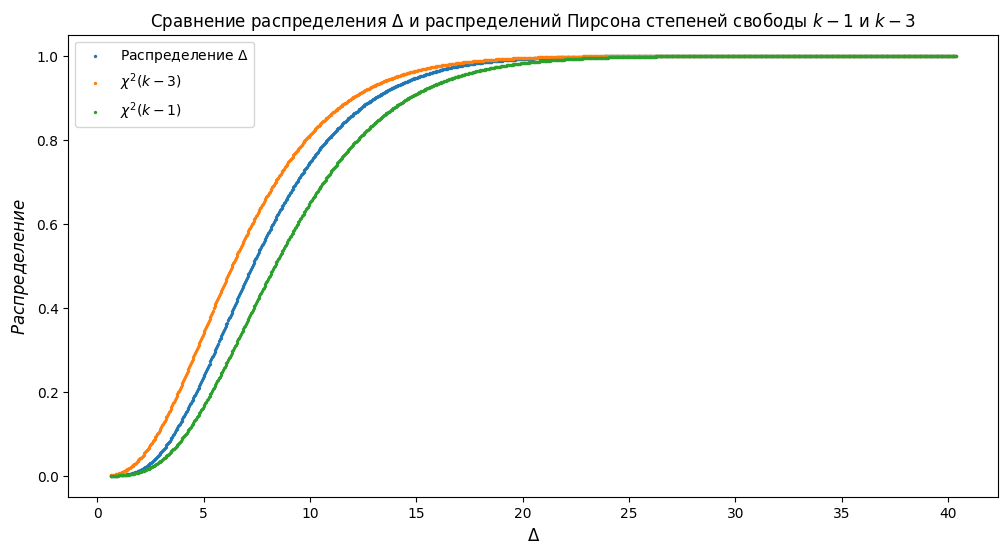

In [113]:
def delta_distribution(delta, deltas):
    return np.count_nonzero(deltas < delta) / len(deltas)

fig, ax = plt.subplots()

x = np.linspace(deltas[0], deltas[-1], 1000)
y = [delta_distribution(t, deltas) for t in x]

x2 = np.linspace(deltas[0], deltas[-1], 1000)
y2 = [Hi2(len(X)-3).P(0, t) for t in x2]
x3 = np.linspace(deltas[0], deltas[-1], 1000)
y3 = [Hi2(len(X)-1).P(0, t) for t in x3]

ax.scatter(x, y, s=2, label='Распределение $\Delta$')
ax.scatter(x2, y2, s=2, label='$\chi^2(k-3)$')
ax.scatter(x3, y3, s=2, label='$\chi^2(k-1)$')

ax.set_title('Сравнение распределения $\Delta$ и распределений Пирсона степеней свободы $k-1$ и $k-3$')
ax.set_xlabel('$\Delta$', fontsize=12)
ax.set_ylabel('$Распределение$', fontsize=12)
ax.legend()
fig.set_figheight(6)
fig.set_figwidth(12)

plt.show()